# **MNIST classification with keras model**

import libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os, sys
workdir_path = '/content/drive/My Drive/Python/ICA/01_MNIST_keras'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [0]:
import tensorflow as tf
import keras
from keras.datasets import mnist


# importing the Sequential model and the specific layers to be used
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax
import numpy as np
import time

# Import dependencies
import json
from keras.models import model_from_json, load_model

plt.style.use('seaborn-whitegrid')

Using TensorFlow backend.


set the basic configurations, load the MNIST database and convert it to the necessary format

In [0]:
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

# split the data between train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the database
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# convert to float32 and with range of (0-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# show the shapes 
print('x_train shape:', x_train.shape)
print('x_test shape:', y_train.shape)
print('samples for train: ', x_train.shape[0])
print('samples for test: ', x_test.shape[0])

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (60000,)
samples for train:  60000
samples for test:  10000


In [0]:
# Deletes the existing model
# del model  

# Load the architecture and load the weights from separeted files
with open('Keras_model_architecture.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('Keras_model_weights.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








3099
prediction:  1
real value:  1


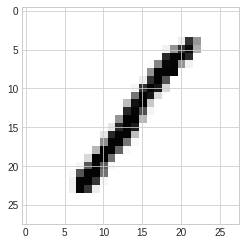

In [0]:
i=randint(1, x_test.shape[0])
print(i)
plt.imshow(x_test[i].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
print("prediction: ", model.predict_classes(x_test[i].reshape((1,28,28,1)))[0])
print("real value: ", argmax(y_test[i]))

In [0]:
runs=100

Average time [ms] for batch of 4  :  2.1915054321289062
Average time [ms] for batch of 8  :  2.267031669616699
Average time [ms] for batch of 16  :  2.611706256866455
Average time [ms] for batch of 32  :  3.187694549560547
Average time [ms] for batch of 64  :  5.38698673248291
Average time [ms] for batch of 128  :  10.422477722167969
Average time [ms] for batch of 256  :  20.565967559814453

Average time/batch size [ms] for batch of 4  :  0.5478763580322266
Average time/batch size [ms] for batch of 8  :  0.2833789587020874
Average time/batch size [ms] for batch of 16  :  0.16323164105415344
Average time/batch size [ms] for batch of 32  :  0.09961545467376709
Average time/batch size [ms] for batch of 64  :  0.08417166769504547
Average time/batch size [ms] for batch of 128  :  0.08142560720443726
Average time/batch size [ms] for batch of 256  :  0.08033581078052521


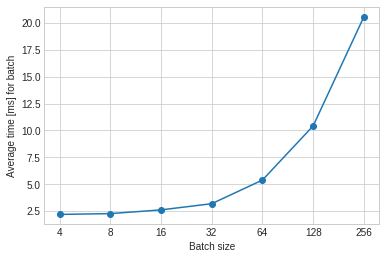

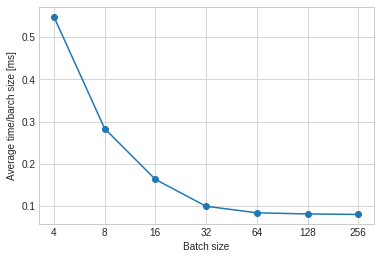

In [0]:
times_model=np.zeros((7,2))

for i in range(7):
  start_time_one_batch=time.time()
  for x in range(runs):
    model.predict_classes(x_test[0:2**(i+2)].reshape((2**(i+2),28,28,1)))
  end_time_one_batch=time.time()
  times_model[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_model[i,1]=times_model[i,1]/(2**(i+2))


# to plot***********************************************
x1=[0, 1, 2, 3, 4, 5, 6]
x2=[0, 1, 2, 3, 4, 5, 6]
plt.style.use('seaborn-whitegrid')

plt.plot(x1, times_model[:,0], marker='o')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x1, my_xticks)

plt.figure()
plt.plot(x2, times_model[:,1], marker='o')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x2, my_xticks)

for i in range(7):
  print('Average time [ms] for batch of',2**(i+2) ,' : ',times_model[i,0])

print('')

for i in range(7):
  print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_model[i,1])


In [0]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,0], times_model[1,0], times_model[2,0], times_model[3,0], times_model[4,0], times_model[5,0], times_model[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,1], times_model[1,1], times_model[2,1], times_model[3,1], times_model[4,1], times_model[5,1], times_model[6,1]))

 | 2.1915 | 2.2670 | 2.6117 | 3.1877 | 5.3870 | 10.4225 | 20.5660

 | 0.5479 | 0.2834 | 0.1632 | 0.0996 | 0.0842 | 0.0814 | 0.0803


With Frozen

In [0]:
import tensorflow as tf
tf.reset_default_graph()
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

In [0]:
def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('Keras_model_graph_frozen.pb')

In [0]:
with graph.as_default():
  # We access the input and output nodes 
  output_node = graph.get_tensor_by_name('prefix/dense_2/Softmax:0')
  input_node = graph.get_tensor_by_name('prefix/conv2d_1_input:0')

Average time [ms] for batch of 4  :  2.567315101623535
Average time [ms] for batch of 8  :  1.788785457611084
Average time [ms] for batch of 16  :  2.0913338661193848
Average time [ms] for batch of 32  :  2.6358604431152344
Average time [ms] for batch of 64  :  3.9287376403808594
Average time [ms] for batch of 128  :  5.149164199829102
Average time [ms] for batch of 256  :  7.8881025314331055

Average time/batch size [ms] for batch of 4  :  0.6418287754058838
Average time/batch size [ms] for batch of 8  :  0.2235981822013855
Average time/batch size [ms] for batch of 16  :  0.13070836663246155
Average time/batch size [ms] for batch of 32  :  0.08237063884735107
Average time/batch size [ms] for batch of 64  :  0.06138652563095093
Average time/batch size [ms] for batch of 128  :  0.040227845311164856
Average time/batch size [ms] for batch of 256  :  0.030812900513410568


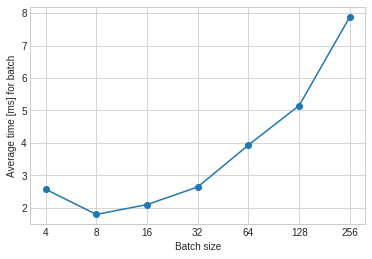

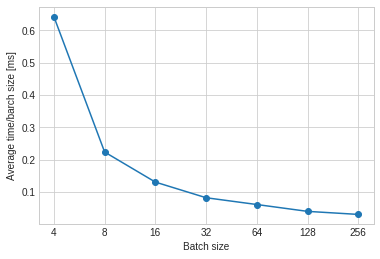

In [0]:
# We launch a Session
sess = tf.Session(graph=graph)

times_frozen=np.zeros((7,2))

for i in range(7):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: x_test[0:2**(i+2)].reshape((2**(i+2),28,28,1))})
  end_time_one_batch=time.time()
  times_frozen[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_frozen[i,1]=times_frozen[i,1]/(2**(i+2))


# to plot***********************************************
x3=[0, 1, 2, 3, 4, 5, 6]
x4=[0, 1, 2, 3, 4, 5, 6]
plt.style.use('seaborn-whitegrid')

plt.plot(x3, times_frozen[:,0], marker='o')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x3, my_xticks)

plt.figure()
plt.plot(x4, times_frozen[:,1], marker='o')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x4, my_xticks)

for i in range(7):
  print('Average time [ms] for batch of',2**(i+2) ,' : ',times_frozen[i,0])

print('')

for i in range(7):
  print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_frozen[i,1])

In [0]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,0], times_frozen[1,0], times_frozen[2,0], times_frozen[3,0], times_frozen[4,0], times_frozen[5,0], times_frozen[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,1], times_frozen[1,1], times_frozen[2,1], times_frozen[3,1], times_frozen[4,1], times_frozen[5,1], times_frozen[6,1]))

 | 2.5673 | 1.7888 | 2.0913 | 2.6359 | 3.9287 | 5.1492 | 7.8881

 | 0.6418 | 0.2236 | 0.1307 | 0.0824 | 0.0614 | 0.0402 | 0.0308


Optimized

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('Keras_model_graph_optimized.pb')

In [0]:
with graph.as_default():
  # We access the input and output nodes 
  output_node = graph.get_tensor_by_name('prefix/dense_2/Softmax:0')
  input_node = graph.get_tensor_by_name('prefix/conv2d_1_input:0')

Average time [ms] for batch of 4  :  2.006359100341797
Average time [ms] for batch of 8  :  1.532754898071289
Average time [ms] for batch of 16  :  1.7636585235595703
Average time [ms] for batch of 32  :  2.26609468460083
Average time [ms] for batch of 64  :  2.997596263885498
Average time [ms] for batch of 128  :  4.383630752563477
Average time [ms] for batch of 256  :  7.252676486968994

Average time/batch size [ms] for batch of 4  :  0.5015897750854492
Average time/batch size [ms] for batch of 8  :  0.19159436225891113
Average time/batch size [ms] for batch of 16  :  0.11022865772247314
Average time/batch size [ms] for batch of 32  :  0.07081545889377594
Average time/batch size [ms] for batch of 64  :  0.04683744162321091
Average time/batch size [ms] for batch of 128  :  0.03424711525440216
Average time/batch size [ms] for batch of 256  :  0.028330767527222633


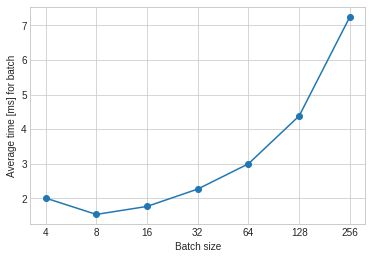

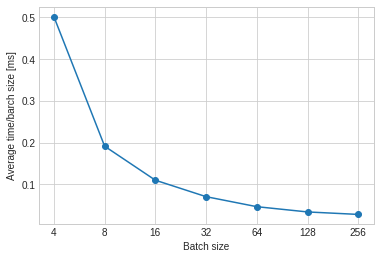

In [0]:
# We launch a Session
sess = tf.Session(graph=graph)

times_optimized=np.zeros((7,2))

for i in range(7):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: x_test[0:2**(i+2)].reshape((2**(i+2),28,28,1))})
  end_time_one_batch=time.time()
  times_optimized[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_optimized[i,1]=times_optimized[i,1]/(2**(i+2))


# to plot***********************************************
x5=[0, 1, 2, 3, 4, 5, 6]
x6=[0, 1, 2, 3, 4, 5, 6]
plt.style.use('seaborn-whitegrid')

plt.plot(x5, times_optimized[:,0], marker='o')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x5, my_xticks)

plt.figure()
plt.plot(x6, times_optimized[:,1], marker='o')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x6, my_xticks)

for i in range(7):
  print('Average time [ms] for batch of',2**(i+2) ,' : ',times_optimized[i,0])

print('')

for i in range(7):
  print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_optimized[i,1])

In [0]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,0], times_optimized[1,0], times_optimized[2,0], times_optimized[3,0], times_optimized[4,0], times_optimized[5,0], times_optimized[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,1], times_optimized[1,1], times_optimized[2,1], times_optimized[3,1], times_optimized[4,1], times_optimized[5,1], times_optimized[6,1]))

 | 2.0064 | 1.5328 | 1.7637 | 2.2661 | 2.9976 | 4.3836 | 7.2527

 | 0.5016 | 0.1916 | 0.1102 | 0.0708 | 0.0468 | 0.0342 | 0.0283


Comparison

Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256
--- | --- | --- | --- | --- | --- | --- | --- 
Model | 2.1915 | 2.2670 | 2.6117 | 3.1877 | 5.3870 | 10.4225 | 20.5660
Frozen | 2.5673 | 1.7888 | 2.0913 | 2.6359 | 3.9287 | 5.1492 | 7.8881
Optimized | 2.0064 | 1.5328 | 1.7637 | 2.2661 | 2.9976 | 4.3836 | 7.2527


Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256
--- | --- | --- | --- | --- | --- | --- | --- 
Model | 0.5479 | 0.2834 | 0.1632 | 0.0996 | 0.0842 | 0.0814 | 0.0803
Frozen | 0.6418 | 0.2236 | 0.1307 | 0.0824 | 0.0614 | 0.0402 | 0.0308
Optimized | 0.5016 | 0.1916 | 0.1102 | 0.0708 | 0.0468 | 0.0342 | 0.0283


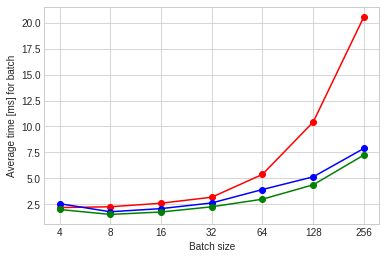

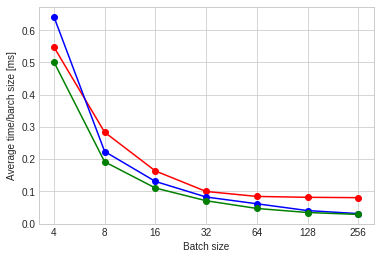

In [0]:
plt.plot(x5, times_model[:,0], marker='o', color='red')
plt.plot(x5, times_frozen[:,0], marker='o', color='blue')
plt.plot(x5, times_optimized[:,0], marker='o', color='green')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x5, my_xticks)

plt.figure()
plt.plot(x6, times_model[:,1], marker='o', color='red')
plt.plot(x6, times_frozen[:,1], marker='o', color='blue')
plt.plot(x6, times_optimized[:,1], marker='o', color='green')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x6, my_xticks)



print("Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256")
print("--- | --- | --- | --- | --- | --- | --- | --- ")
print("Model | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,0], times_model[1,0], times_model[2,0], times_model[3,0], times_model[4,0], times_model[5,0], times_model[6,0]))
print("Frozen | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,0], times_frozen[1,0], times_frozen[2,0], times_frozen[3,0], times_frozen[4,0], times_frozen[5,0], times_frozen[6,0]))
print("Optimized | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,0], times_optimized[1,0], times_optimized[2,0], times_optimized[3,0], times_optimized[4,0], times_optimized[5,0], times_optimized[6,0]))
print('')
print('')
print("Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256")
print("--- | --- | --- | --- | --- | --- | --- | --- ")
print("Model | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,1], times_model[1,1], times_model[2,1], times_model[3,1], times_model[4,1], times_model[5,1], times_model[6,1]))
print("Frozen | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,1], times_frozen[1,1], times_frozen[2,1], times_frozen[3,1], times_frozen[4,1], times_frozen[5,1], times_frozen[6,1]))
print("Optimized | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,1], times_optimized[1,1], times_optimized[2,1], times_optimized[3,1], times_optimized[4,1], times_optimized[5,1], times_optimized[6,1]))